In [ ]:
%pip install pandas
%pip install pandas_datareader
%pip install datetime
%pip install matplotlib
%pip install seaborn
%pip install pyarrow
%pip install fastparquet
%pip install yfinance
%pip install html5lib

In [42]:
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf
from matplotlib import style

plt.style.use('fivethirtyeight')


In [123]:
start = dt.datetime(2014, 1, 1)        
end = dt.datetime(2021, 10, 10) 

sp500 = web.DataReader(['sp500'], 'fred', start, end)

In [124]:
sp500['daily_return'] = (SP500['sp500']/ SP500['sp500'].shift(1)) -1

#Drop all Not a number values using drop method.
sp500.dropna(inplace = True)

splast = sp500.tail(5)
print(splast)

              sp500  daily_return
DATE                             
2021-01-21  3853.07      0.000317
2021-01-22  3841.47     -0.003011
2021-01-25  3855.36      0.003616
2021-01-26  3849.62     -0.001489
2021-01-27  3750.77     -0.025678


<AxesSubplot: title={'center': 'S&P 500 daily returns'}, xlabel='DATE'>

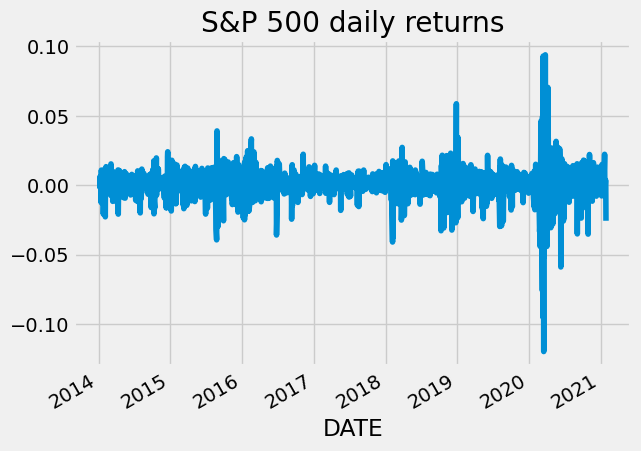

In [125]:
sp500['daily_return'].plot(title='S&P 500 daily returns')

<AxesSubplot: title={'center': 'S&P 500 Price'}, xlabel='DATE'>

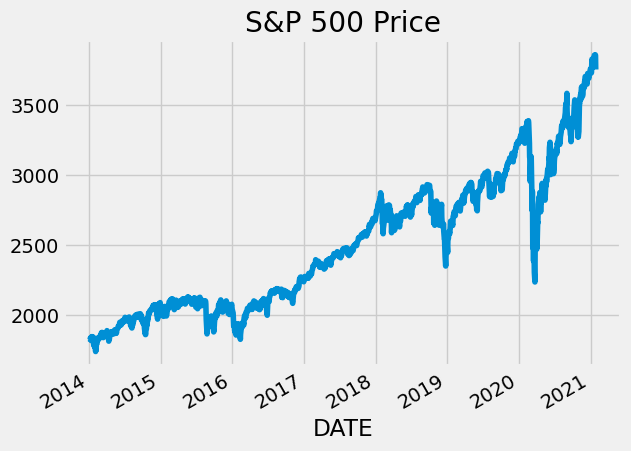

In [126]:
SP500['sp500'].plot(title='S&P 500 Price')

In [137]:
import pandas as pd

start = dt.datetime(2014, 1, 1)        
end = dt.datetime(2021, 10, 10)

tickers_list = ['AAPL', 'WMT', 'IBM', 'MU', 'BA', 'AXP']

# Fetch the data
import yfinance as yf
data = yf.download(tickers_list, start, end)['Adj Close']

# Print first 5 rows of the data
print(data.head())

[*********************100%***********************]  6 of 6 completed
                 AAPL        AXP          BA         IBM         MU        WMT
Date                                                                          
2014-01-02  17.415535  78.466026  116.807922  122.360901  21.489737  64.751457
2014-01-03  17.032982  78.720451  117.619904  123.092979  20.805159  64.538139
2014-01-06  17.125866  78.685326  118.295097  122.670860  20.507519  64.177048
2014-01-07  17.003391  78.387054  120.089874  125.117699  21.559185  64.374001
2014-01-08  17.111071  78.633354  120.354843  123.970139  23.682364  63.865250


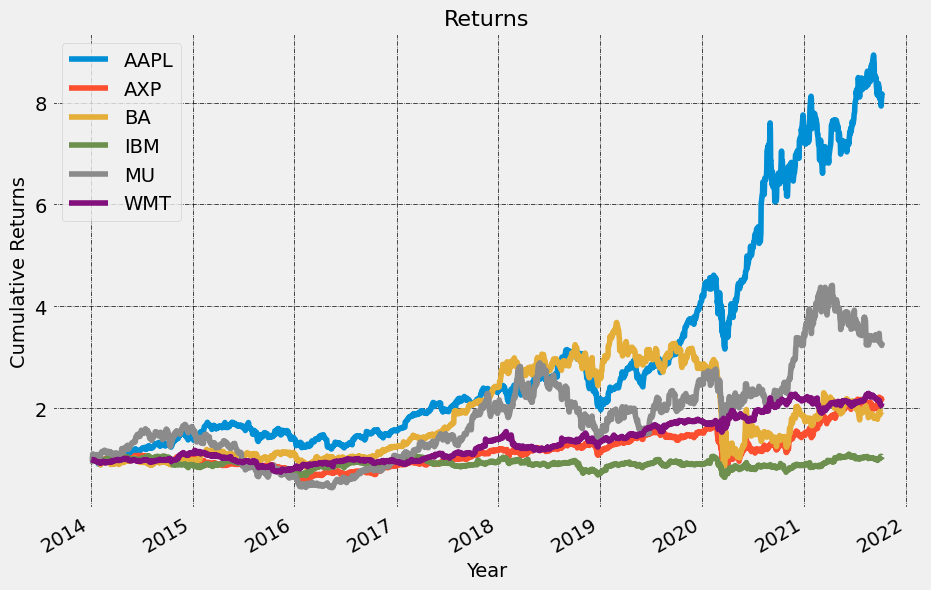

In [138]:
# Plot all the close prices
((data.pct_change()+1).cumprod()).plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()